# Imports

In [18]:
try:
    from IPython.core.display import display, HTML

    display(HTML("<style>.container { width:100% !important; }</style>"))
except Exception as e:
    pass

%load_ext memory_profiler
%load_ext jupyter_black
%load_ext line_profiler
%load_ext autoreload
%load_ext autotime
%autosave 300
%autoreload 2

D:\Temp\AppData\Local\Temp\ipykernel_35856\3193644951.py:2: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime


Autosaving every 300 seconds
time: 32 ms (started: 2025-12-17 04:17:10 +03:00)


In [19]:
from astro_flares import *

import plotly.io as pio

pio.renderers.default = "notebook"  # или "jupyterlab" если JupyterLab

time: 0 ns (started: 2025-12-17 04:17:10 +03:00)


# Data

In [5]:
dataset = load_dataset(
    "snad-space/ztf-m-dwarf-flares-2025",
    cache_dir="D:\.cache\huggingface",
    split="train",
    streaming=True,
)

Resolving data files:   0%|          | 0/314 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/314 [00:00<?, ?it/s]

time: 12.7 s (started: 2025-12-17 04:00:59 +03:00)


In [6]:
df = pl.DataFrame(
    list(dataset.shuffle(buffer_size=1_000, seed=42).take(1_000))
    + list(dataset.take(1_000))
)
df

shape: (2_000, 5)
┌──────────────────────────────────┬───────┬────────────────────┬──────────────────────────┬────────────────────────┐
│ id                               ┆ class ┆ mjd                ┆ mag                      ┆ magerr                 │
│ ---                              ┆ ---   ┆ ---                ┆ ---                      ┆ ---                    │
│ str                              ┆ i64   ┆ list[f64]          ┆ list[f64]                ┆ list[f64]              │
╞══════════════════════════════════╪═══════╪════════════════════╪══════════════════════════╪════════════════════════╡
│ TIC260352702_CADENCE204203_ZTF…  ┆ 1     ┆ [58720.19607,      ┆ [17.02846, 17.021832, …  ┆ [0.016799, 0.015893, … │
│                                  ┆       ┆ 58720.19652, … 5…  ┆ 16.993…                  ┆ 0.01392…               │
│ TIC234523931_CADENCE231234_ZTF…  ┆ 1     ┆ [58673.38164,      ┆ [14.419371, 14.43163, …  ┆ [0.01076, 0.010346, …  │
│                                  ┆       ┆ 58673.38343, … 5…  ┆ 14.411…                  ┆ 0.013891…              │
│ TIC29671923_CADENCE232959_ZTFD…  ┆ 1     ┆ [58317.2832,       ┆ [13.809133, 13.791163, … ┆ [0.01203, 0.010807, …  │
│                                  ┆       ┆ 58317.28457, … 58… ┆ 13.71…                   ┆ 0.009823…              │
│ TIC237883499_CADENCE273312_ZTF…  ┆ 1     ┆ [58673.23666,      ┆ [17.290174, 17.315382, … ┆ [0.024313, 0.026946, … │
│                                  ┆       ┆ 58673.23712, … 5…  ┆ 17.05…                   ┆ 0.02554…               │
│ TIC349762144_CADENCE42267_ZTFD…  ┆ 1     ┆ [58658.26441,      ┆ [18.954103, 18.742413, … ┆ [0.06728, 0.049114, …  │
│                                  ┆       ┆ 58658.26486, … 5…  ┆ 19.37…                   ┆ 0.071265…              │
│ …                                ┆ …     ┆ …                  ┆ …                        ┆ …                      │
│ ZTFDR333203100188987_MJD58314.…  ┆ 0     ┆ [58314.25806,      ┆ [17.990116, 17.849888, … ┆ [0.041173, 0.038448, … │
│                                  ┆       ┆ 58314.25851, … 5…  ┆ 18.08…                   ┆ 0.04318…               │
│ ZTFDR334208100155061_MJD58720.…  ┆ 0     ┆ [58720.19766,      ┆ [18.554863, 18.665051, … ┆ [0.057336, 0.061514, … │
│                                  ┆       ┆ 58720.1981, … 58…  ┆ 18.65…                   ┆ 0.06111…               │
│ ZTFDR639210300162741_MJD58337.…  ┆ 0     ┆ [58337.2135,       ┆ [18.00469, 18.098808, …  ┆ [0.033585, 0.034957, … │
│                                  ┆       ┆ 58337.21444, … 58… ┆ 17.940…                  ┆ 0.03271…               │
│ ZTFDR436209300170840_MJD58697.…  ┆ 0     ┆ [58697.22557,      ┆ [20.554884, 20.450432, … ┆ [0.156227, 0.149136, … │
│                                  ┆       ┆ 58697.22602, … 5…  ┆ 19.96…                   ┆ 0.11395…               │
│ ZTFDR464205200003897_MJD58854.…  ┆ 0     ┆ [58854.26278,      ┆ [18.529255, 18.304008, … ┆ [0.040405, 0.034453, … │
│                                  ┆       ┆ 58854.26932, … 5…  ┆ 18.69…                   ┆ 0.04564…               │
└──────────────────────────────────┴───────┴────────────────────┴──────────────────────────┴────────────────────────┘

time: 32.9 s (started: 2025-12-17 04:01:12 +03:00)


In [17]:
df.columns, df.dtypes

(['id', 'class', 'mjd', 'mag', 'magerr'],
 [String, Int64, List(Float64), List(Float64), List(Float64)])

time: 0 ns (started: 2025-12-17 04:06:56 +03:00)


# EDA

In [10]:
df["class"].sum()

1000

time: 15 ms (started: 2025-12-17 04:05:33 +03:00)


In [13]:
norm_series(df, 13)

time: 109 ms (started: 2025-12-17 04:05:56 +03:00)


In [14]:
compare_classes(df)

time: 94 ms (started: 2025-12-17 04:06:01 +03:00)


# ML

In [20]:
features = extract_features(df)
features

shape: (2_000, 24)
┌──────────────────┬───────┬─────────┬──────────┬───┬──────────────────┬──────────────────┬───────────┬─────────────┐
│ id               ┆ class ┆ npoints ┆ mag_std  ┆ … ┆ norm_frac_below_ ┆ norm_amplitude_s ┆ norm_mean ┆ norm_median │
│ ---              ┆ ---   ┆ ---     ┆ ---      ┆   ┆ 3sigma           ┆ igma             ┆ ---       ┆ ---         │
│ str              ┆ i64   ┆ i64     ┆ f64      ┆   ┆ ---              ┆ ---              ┆ f64       ┆ f64         │
│                  ┆       ┆         ┆          ┆   ┆ f64              ┆ f64              ┆           ┆             │
╞══════════════════╪═══════╪═════════╪══════════╪═══╪══════════════════╪══════════════════╪═══════════╪═════════════╡
│ TIC260352702_CAD ┆ 1     ┆ 13      ┆ 0.081602 ┆ … ┆ 0.076923         ┆ 21.590071        ┆ -2.120913 ┆ 0.0         │
│ ENCE204203_ZTF…  ┆       ┆         ┆          ┆   ┆                  ┆                  ┆           ┆             │
│ TIC234523931_CAD ┆ 1     ┆ 39      ┆ 0.032927 ┆ … ┆ 0.051282         ┆ 15.16939         ┆ -0.708243 ┆ 0.0         │
│ ENCE231234_ZTF…  ┆       ┆         ┆          ┆   ┆                  ┆                  ┆           ┆             │
│ TIC29671923_CADE ┆ 1     ┆ 31      ┆ 0.200192 ┆ … ┆ 0.0              ┆ 79.643779        ┆ 0.117066  ┆ 0.0         │
│ NCE232959_ZTFD…  ┆       ┆         ┆          ┆   ┆                  ┆                  ┆           ┆             │
│ TIC237883499_CAD ┆ 1     ┆ 12      ┆ 0.088448 ┆ … ┆ 0.0              ┆ 11.831557        ┆ -1.29079  ┆ 0.0         │
│ ENCE273312_ZTF…  ┆       ┆         ┆          ┆   ┆                  ┆                  ┆           ┆             │
│ TIC349762144_CAD ┆ 1     ┆ 10      ┆ 0.174138 ┆ … ┆ 0.0              ┆ 10.630734        ┆ -0.724956 ┆ 0.0         │
│ ENCE42267_ZTFD…  ┆       ┆         ┆          ┆   ┆                  ┆                  ┆           ┆             │
│ …                ┆ …     ┆ …       ┆ …        ┆ … ┆ …                ┆ …                ┆ …         ┆ …           │
│ ZTFDR33320310018 ┆ 0     ┆ 128     ┆ 0.140872 ┆ … ┆ 0.0              ┆ 16.234911        ┆ 1.309107  ┆ 0.0         │
│ 8987_MJD58314.…  ┆       ┆         ┆          ┆   ┆                  ┆                  ┆           ┆             │
│ ZTFDR33420810015 ┆ 0     ┆ 13      ┆ 0.113082 ┆ … ┆ 0.0              ┆ 7.87786          ┆ -0.42091  ┆ 0.0         │
│ 5061_MJD58720.…  ┆       ┆         ┆          ┆   ┆                  ┆                  ┆           ┆             │
│ ZTFDR63921030016 ┆ 0     ┆ 117     ┆ 0.082975 ┆ … ┆ 0.0              ┆ 11.705345        ┆ -0.027148 ┆ 0.0         │
│ 2741_MJD58337.…  ┆       ┆         ┆          ┆   ┆                  ┆                  ┆           ┆             │
│ ZTFDR43620930017 ┆ 0     ┆ 13      ┆ 0.286189 ┆ … ┆ 0.0              ┆ 5.86679          ┆ -0.866246 ┆ 0.0         │
│ 0840_MJD58697.…  ┆       ┆         ┆          ┆   ┆                  ┆                  ┆           ┆             │
│ ZTFDR46420520000 ┆ 0     ┆ 13      ┆ 0.111371 ┆ … ┆ 0.0              ┆ 9.685566         ┆ -0.292981 ┆ 0.0         │
│ 3897_MJD58854.…  ┆       ┆         ┆          ┆   ┆                  ┆                  ┆           ┆             │
└──────────────────┴───────┴─────────┴──────────┴───┴──────────────────┴──────────────────┴───────────┴─────────────┘

time: 7.91 s (started: 2025-12-17 04:17:26 +03:00)


In [31]:
set("id")

{'d', 'i'}

time: 0 ns (started: 2025-12-17 04:25:44 +03:00)


In [29]:
from mlframe.training.configs import PolarsPipelineConfig, TrainingSplitConfig
from mlframe.training.core import train_mlframe_models_suite
from mlframe.profiling.profile_training import create_synthetic_data
from mlframe.training.extractors import SimpleFeaturesAndTargetsExtractor

time: 0 ns (started: 2025-12-17 04:23:29 +03:00)


In [32]:
ft_extractor = SimpleFeaturesAndTargetsExtractor(
    classification_targets=["class"], columns_to_drop=set(["id"]), verbose=1
)

time: 16 ms (started: 2025-12-17 04:25:51 +03:00)


Raw data:
<class 'polars.dataframe.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 24 entries, id to norm_median
dtypes: Float64(21), Int64(2), String(1)
memory usage: 0.0+ GB
Processed data:
<class 'polars.dataframe.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 24 entries, id to norm_median
dtypes: Float64(21), Int64(2), String(1)
memory usage: 0.0+ GB


'binary_classification class'

shape: (2, 2)
┌─────┬────────────┐
│     ┆ proportion │
│ --- ┆ ---        │
│ i8  ┆ f64        │
╞═════╪════════════╡
│ 1   ┆ 0.5        │
│ 0   ┆ 0.5        │
└─────┴────────────┘

id  class  npoints  \
0  TIC260352702_CADENCE204203_ZTFDR28420620003496...      1       13   
1  TIC234523931_CADENCE231234_ZTFDR59320210001770...      1       39   
2  TIC29671923_CADENCE232959_ZTFDR384210400051842...      1       31   
3  TIC237883499_CADENCE273312_ZTFDR53720230002010...      1       12   
4  TIC349762144_CADENCE42267_ZTFDR485202100046170...      1       10   

    mag_std  mag_skewness  mag_kurtosis  mag_frac_below_3sigma  \
0  0.081602     -2.026675      3.157723                    0.0   
1  0.032927     -2.873871      8.348576                    0.0   
2  0.200192     -0.746351      0.088196                    0.0   
3  0.088448     -1.630231      1.075138                    0.0   
4  0.174138     -0.737556     -0.057765                    0.0   

   mag_amplitude_sigma   mag_mean  mag_median  ...  magerr_amplitude_sigma  \
0             0.307751  16.991599   17.021832  ...                0.002874   
1             0.163368  14.407945   14.415572  ...                0.004914   
2             0.785174  13.562053   13.560899  ...                0.006355   
3             0.281370  17.267191   17.297888  ...                0.010674   
4             0.634008  19.123613   19.166849  ...                0.024533   

   magerr_mean  magerr_median   norm_std  norm_skewness  norm_kurtosis  \
0     0.015111       0.014254   5.724717      -2.026675       3.157723   
1     0.011278       0.010770   3.057441      -2.873871       8.348576   
2     0.010865       0.009859  20.306332      -0.746351       0.088196   
3     0.024533       0.023781   3.719226      -1.630231       1.075138   
4     0.059753       0.059639   2.919851      -0.737556      -0.057765   

   norm_frac_below_3sigma  norm_amplitude_sigma  norm_mean  norm_median  
0                0.076923             21.590071  -2.120913          0.0  
1                0.051282             15.169390  -0.708243          0.0  
2                0.000000             79.643779   0.117066          0.0  
3                0.000000             11.831557  -1.290790          0.0  
4                0.000000             10.630734  -0.724956          0.0  

[5 rows x 24 columns]

id  class  npoints   mag_std  \
0  ZTFDR333203100188987_MJD58314.25806      0      128  0.140872   
1  ZTFDR334208100155061_MJD58720.19766      0       13  0.113082   
2   ZTFDR639210300162741_MJD58337.2135      0      117  0.082975   
3  ZTFDR436209300170840_MJD58697.22557      0       13  0.286189   
4  ZTFDR464205200003897_MJD58854.26278      0       13  0.111371   

   mag_skewness  mag_kurtosis  mag_frac_below_3sigma  mag_amplitude_sigma  \
0      0.307123     -1.059739                    0.0             0.656855   
1     -0.585438      0.246420                    0.0             0.459120   
2      0.103810     -0.310728                    0.0             0.385292   
3     -0.191891     -1.494556                    0.0             0.874952   
4     -0.949501      0.306568                    0.0             0.404732   

    mag_mean  mag_median  ...  magerr_amplitude_sigma  magerr_mean  \
0  18.008026   17.955060  ...                0.013861     0.041734   
1  18.556040   18.580570  ...                0.016346     0.057558   
2  17.954970   17.955864  ...                0.005217     0.032944   
3  20.321243   20.450432  ...                0.061379     0.139554   
4  18.563578   18.575821  ...                0.011593     0.041573   

   magerr_median  norm_std  norm_skewness  norm_kurtosis  \
0       0.040459  3.481805       0.307123      -1.059739   
1       0.058280  1.940333      -0.585438       0.246420   
2       0.032916  2.520804       0.103810      -0.310728   
3       0.149136  1.918976      -0.191891      -1.494556   
4       0.041787  2.665208      -0.949501       0.306568   

   norm_frac_below_3sigma  norm_amplitude_sigma  norm_mean  norm_median  
0                     0.0             16.234911   1.309107          0.0  
1                     0.0              7.877860  -0.420910          0.0  
2                     0.0             11.705345  -0.027148          0.0  
3                     0.0              5.866790  -0.866246          0.0  
4                     0.0              9.685566  -0.292981          0.0  

[5 rows x 24 columns]

target type:   0%|          | 0/1 [00:00<?, ?it/s]

target:   0%|          | 0/1 [00:00<?, ?it/s]

pre_pipeline:   0%|          | 0/1 [00:00<?, ?it/s]

mlframe model:   0%|          | 0/2 [00:00<?, ?it/s]

weighting schema:   0%|          | 0/1 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Sanity Checking: |                                                                            | 0/? [00:00<?, …

D:\ProgramData\anaconda3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
D:\ProgramData\anaconda3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
D:\ProgramData\anaconda3\Lib\site-packages\lightning\pytorch\loops\fit_loop.py:310: The number of training batches (2) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |                                                                                   | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

INFO: Metric val_ICE improved. New best score: 0.780
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_ICE improved. New best score: 0.780


Validation: |                                                                                 | 0/? [00:00<?, …

INFO: Metric val_ICE improved by 0.318 >= min_delta = 0.001. New best score: 0.462
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_ICE improved by 0.318 >= min_delta = 0.001. New best score: 0.462


Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

INFO: Metric val_ICE improved by 0.056 >= min_delta = 0.001. New best score: 0.406
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_ICE improved by 0.056 >= min_delta = 0.001. New best score: 0.406


Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

INFO: Metric val_ICE improved by 0.034 >= min_delta = 0.001. New best score: 0.372
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_ICE improved by 0.034 >= min_delta = 0.001. New best score: 0.372


Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

INFO: Metric val_ICE improved by 0.004 >= min_delta = 0.001. New best score: 0.368
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_ICE improved by 0.004 >= min_delta = 0.001. New best score: 0.368


Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

INFO: Metric val_ICE improved by 0.005 >= min_delta = 0.001. New best score: 0.363
INFO:lightning.pytorch.callbacks.early_stopping:Metric val_ICE improved by 0.005 >= min_delta = 0.001. New best score: 0.363


Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

Validation: |                                                                                 | 0/? [00:00<?, …

INFO: Monitored metric val_ICE did not improve in the last 100 records. Best score: 0.363. Signaling Trainer to stop.
INFO:lightning.pytorch.callbacks.early_stopping:Monitored metric val_ICE did not improve in the last 100 records. Best score: 0.363. Signaling Trainer to stop.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True


es_best_iter: 149


INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\ProgramData\anaconda3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


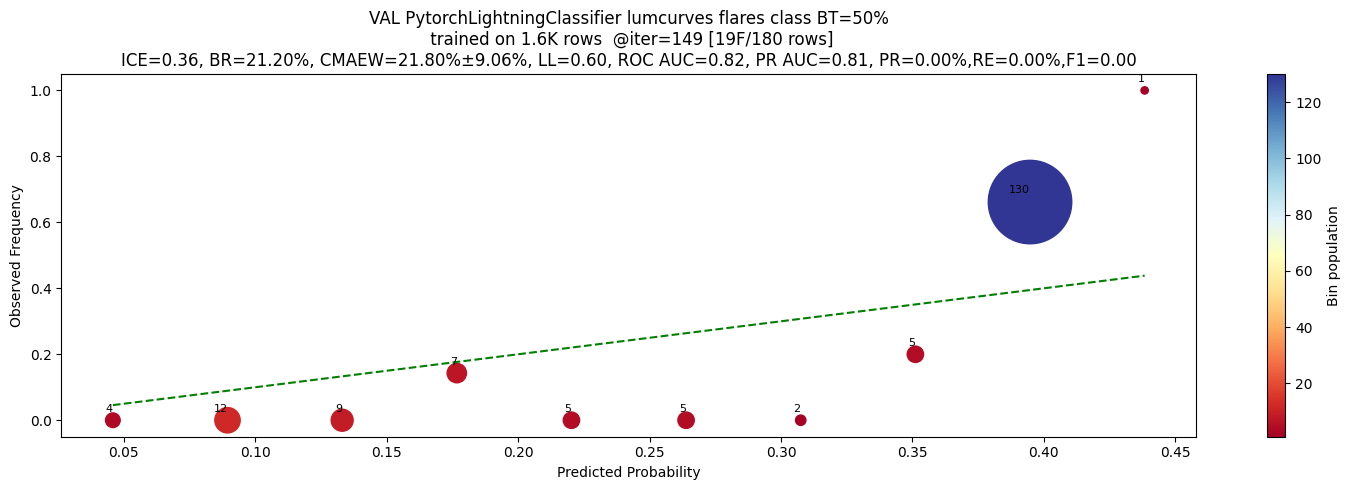

VAL PytorchLightningClassifier lumcurves flares class BT=50%
 trained on 1.6K rows  @iter=149
              precision    recall  f1-score   support

           0     0.5056    1.0000    0.6716        91
           1     0.0000    0.0000    0.0000        89

    accuracy                         0.5056       180
   macro avg     0.2528    0.5000    0.3358       180
weighted avg     0.2556    0.5056    0.3395       180

ROC AUCs: 1=0.8174
PR AUCs: 1=0.8063
CALIBRATIONs: 
	1: MAEW=21.80%, STD=9.06%, COV=50%
BRIER LOSSes: 
	1=21.2032%
LOG_LOSSes: 
	1=0.6003
ICEs: 
	1=0.3633
TOTAL INTEGRAL ERROR: 0.3633


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\ProgramData\anaconda3\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:433: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


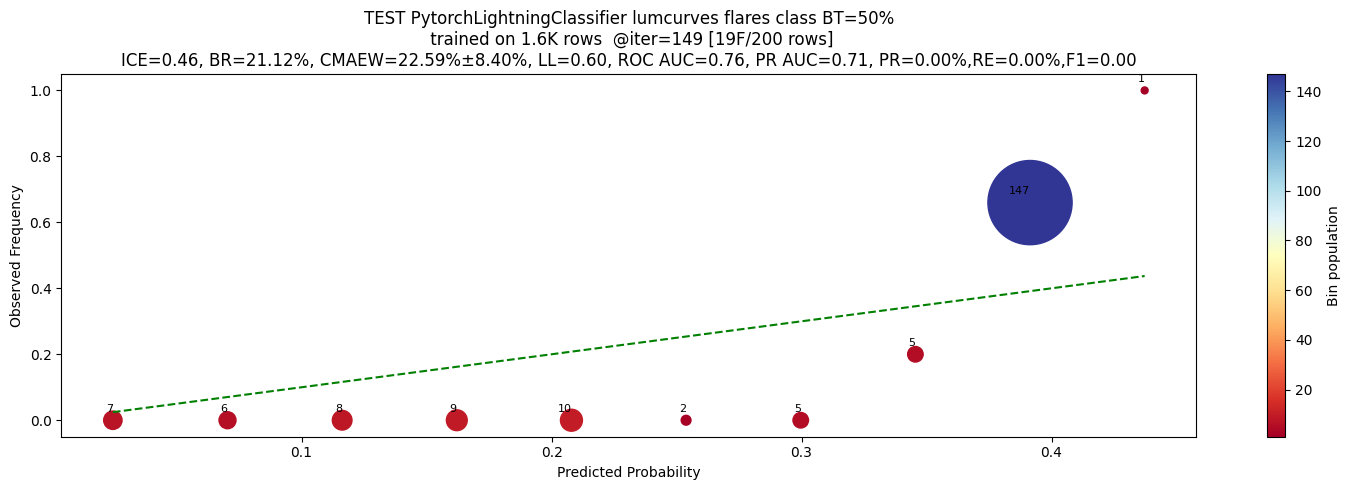

TEST PytorchLightningClassifier lumcurves flares class BT=50%
 trained on 1.6K rows  @iter=149
              precision    recall  f1-score   support

           0     0.5050    1.0000    0.6711       101
           1     0.0000    0.0000    0.0000        99

    accuracy                         0.5050       200
   macro avg     0.2525    0.5000    0.3355       200
weighted avg     0.2550    0.5050    0.3389       200

ROC AUCs: 1=0.7647
PR AUCs: 1=0.7077
CALIBRATIONs: 
	1: MAEW=22.59%, STD=8.40%, COV=50%
BRIER LOSSes: 
	1=21.1204%
LOG_LOSSes: 
	1=0.5973
ICEs: 
	1=0.4624
TOTAL INTEGRAL ERROR: 0.4624


weighting schema:   0%|          | 0/1 [00:00<?, ?it/s]

D:\ProgramData\anaconda3\Lib\site-packages\catboost\core.py:2321: UserWarning:

Can't optimze method "evaluate" because self argument is used



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Default metric period is 5 because PythonUserDefinedPerObject is/are not implemented for GPU


es_best_iter: 6


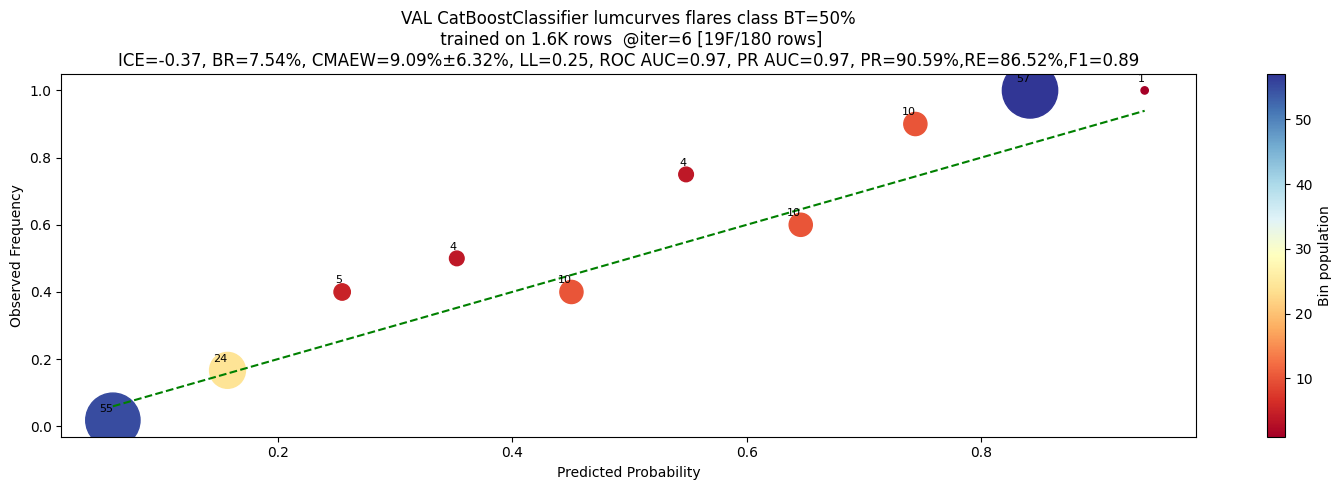

VAL CatBoostClassifier lumcurves flares class BT=50%
 trained on 1.6K rows  @iter=6
              precision    recall  f1-score   support

           0     0.8737    0.9121    0.8925        91
           1     0.9059    0.8652    0.8851        89

    accuracy                         0.8889       180
   macro avg     0.8898    0.8886    0.8888       180
weighted avg     0.8896    0.8889    0.8888       180

ROC AUCs: 1=0.9657
PR AUCs: 1=0.9689
CALIBRATIONs: 
	1: MAEW=9.09%, STD=6.32%, COV=90%
BRIER LOSSes: 
	1=7.5377%
LOG_LOSSes: 
	1=0.2547
ICEs: 
	1=-0.3662
TOTAL INTEGRAL ERROR: -0.3662


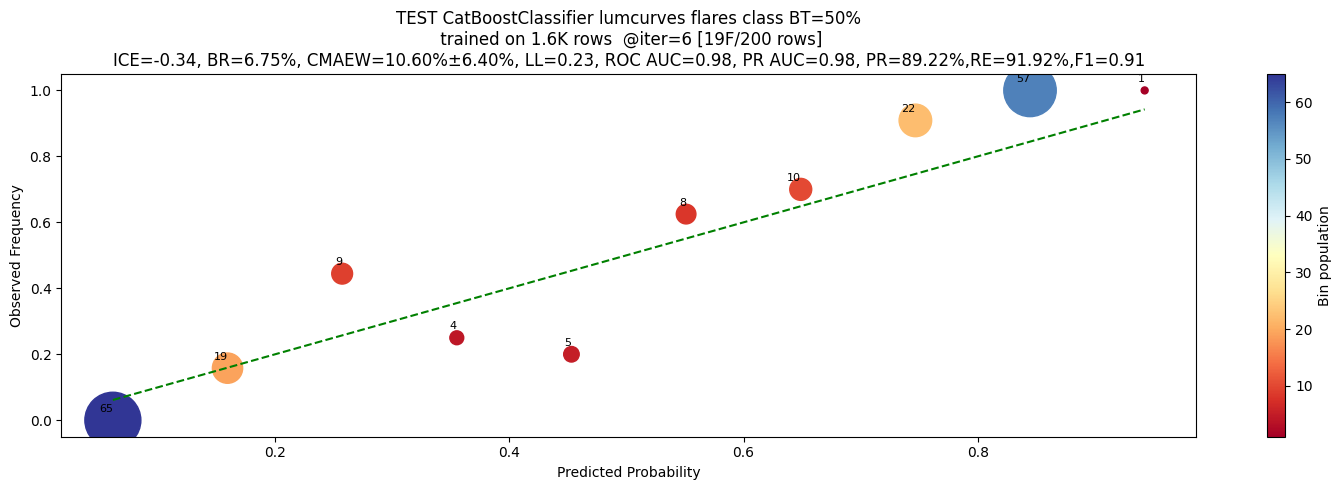

TEST CatBoostClassifier lumcurves flares class BT=50%
 trained on 1.6K rows  @iter=6
              precision    recall  f1-score   support

           0     0.9184    0.8911    0.9045       101
           1     0.8922    0.9192    0.9055        99

    accuracy                         0.9050       200
   macro avg     0.9053    0.9051    0.9050       200
weighted avg     0.9054    0.9050    0.9050       200

ROC AUCs: 1=0.9764
PR AUCs: 1=0.9780
CALIBRATIONs: 
	1: MAEW=10.60%, STD=6.40%, COV=90%
BRIER LOSSes: 
	1=6.7477%
LOG_LOSSes: 
	1=0.2315
ICEs: 
	1=-0.3395
TOTAL INTEGRAL ERROR: -0.3395


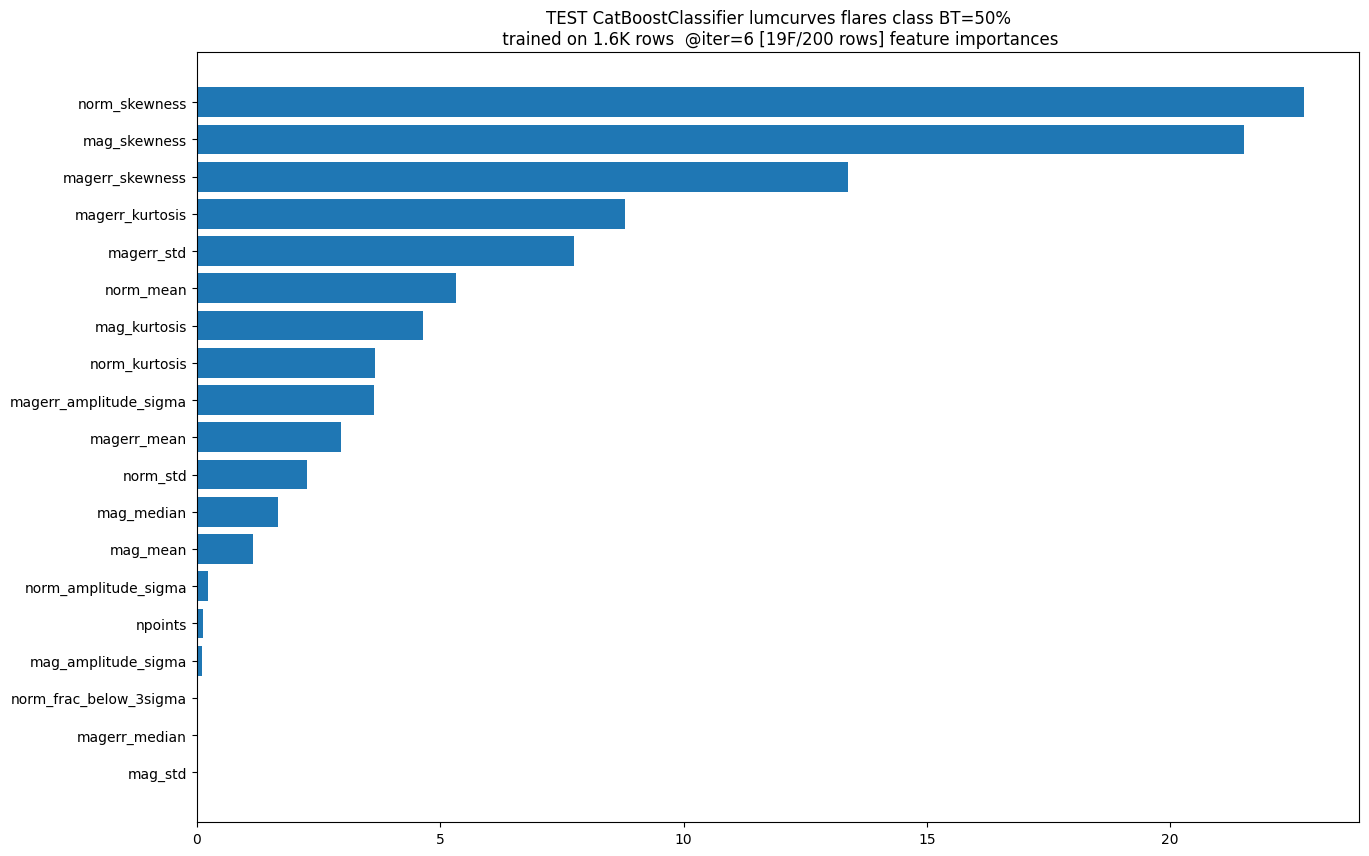

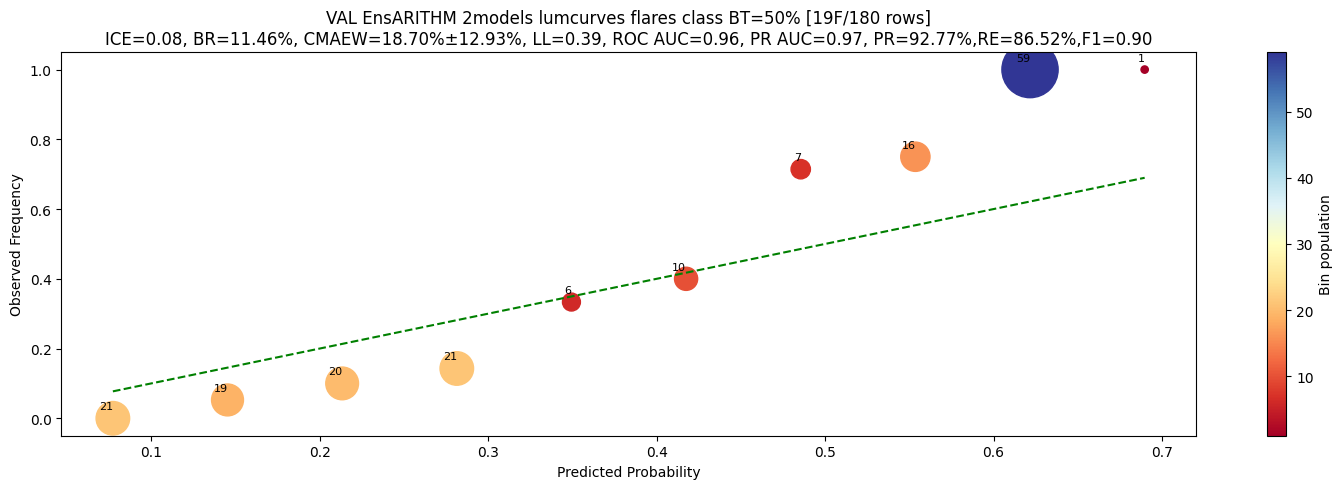

VAL EnsARITHM 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.8763    0.9341    0.9043        91
           1     0.9277    0.8652    0.8953        89

    accuracy                         0.9000       180
   macro avg     0.9020    0.8996    0.8998       180
weighted avg     0.9017    0.9000    0.8999       180

ROC AUCs: 1=0.9622
PR AUCs: 1=0.9668
CALIBRATIONs: 
	1: MAEW=18.70%, STD=12.93%, COV=70%
BRIER LOSSes: 
	1=11.4585%
LOG_LOSSes: 
	1=0.3917
ICEs: 
	1=0.0755
TOTAL INTEGRAL ERROR: 0.0755


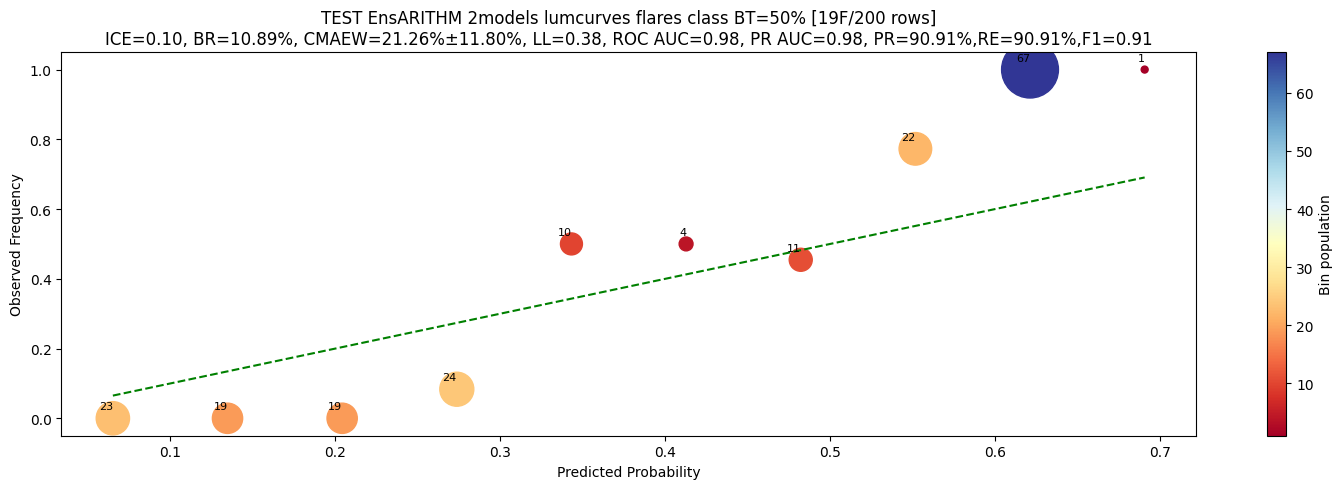

TEST EnsARITHM 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.9109    0.9109    0.9109       101
           1     0.9091    0.9091    0.9091        99

    accuracy                         0.9100       200
   macro avg     0.9100    0.9100    0.9100       200
weighted avg     0.9100    0.9100    0.9100       200

ROC AUCs: 1=0.9775
PR AUCs: 1=0.9788
CALIBRATIONs: 
	1: MAEW=21.26%, STD=11.80%, COV=70%
BRIER LOSSes: 
	1=10.8920%
LOG_LOSSes: 
	1=0.3778
ICEs: 
	1=0.1033
TOTAL INTEGRAL ERROR: 0.1033


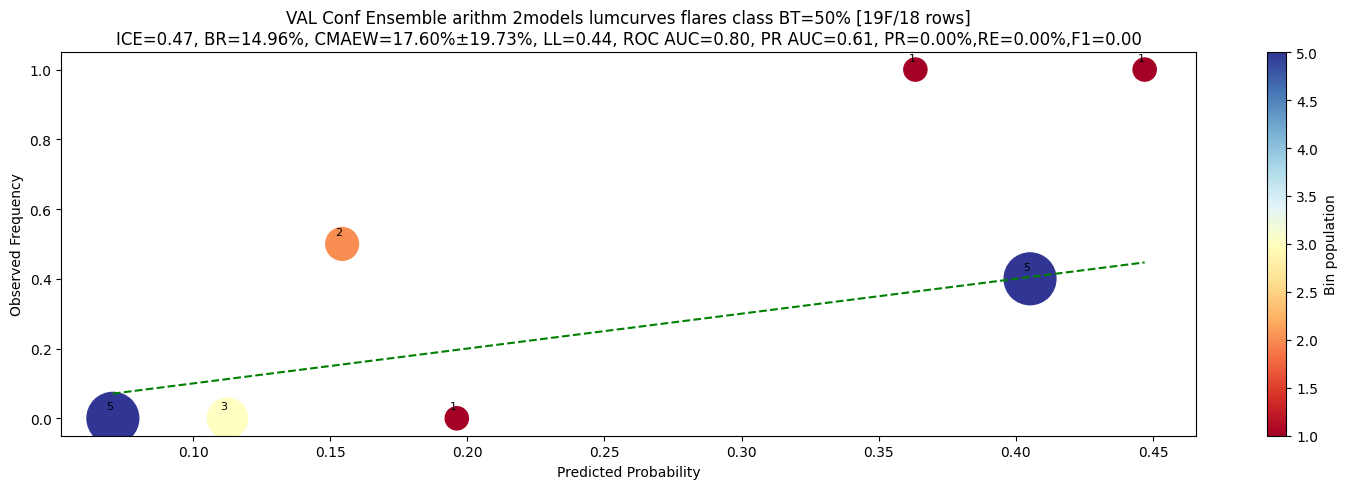

VAL Conf Ensemble arithm 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.7222    1.0000    0.8387        13
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.7222        18
   macro avg     0.3611    0.5000    0.4194        18
weighted avg     0.5216    0.7222    0.6057        18

ROC AUCs: 1=0.8000
PR AUCs: 1=0.6054
CALIBRATIONs: 
	1: MAEW=17.60%, STD=19.73%, COV=30%
BRIER LOSSes: 
	1=14.9589%
LOG_LOSSes: 
	1=0.4428
ICEs: 
	1=0.4719
TOTAL INTEGRAL ERROR: 0.4719


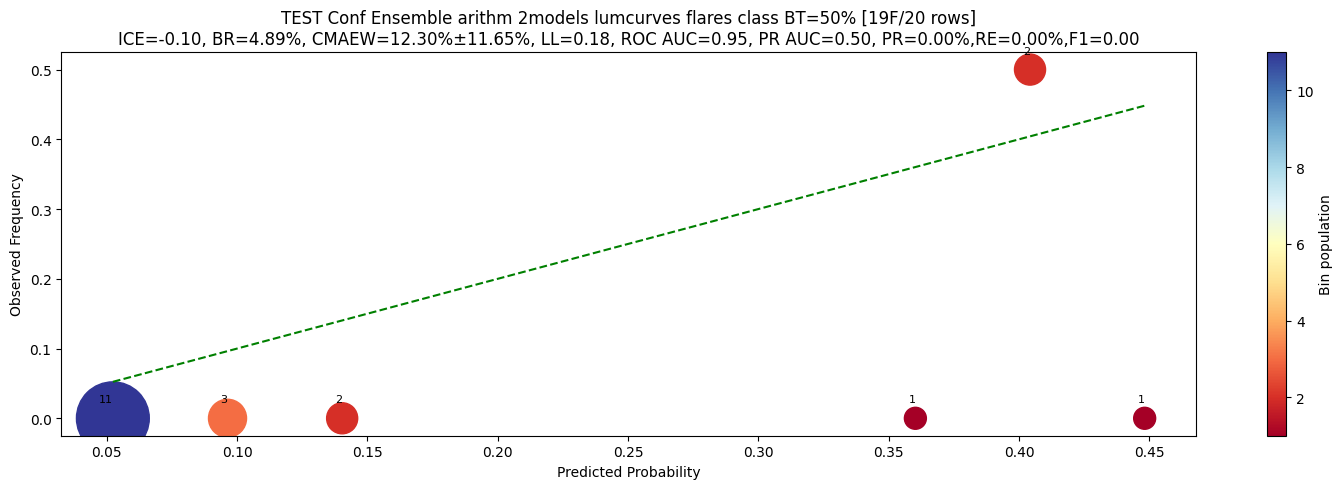

TEST Conf Ensemble arithm 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.9500    1.0000    0.9744        19
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.9500        20
   macro avg     0.4750    0.5000    0.4872        20
weighted avg     0.9025    0.9500    0.9256        20

ROC AUCs: 1=0.9474
PR AUCs: 1=0.5000
CALIBRATIONs: 
	1: MAEW=12.30%, STD=11.65%, COV=20%
BRIER LOSSes: 
	1=4.8901%
LOG_LOSSes: 
	1=0.1836
ICEs: 
	1=-0.0996
TOTAL INTEGRAL ERROR: -0.0996


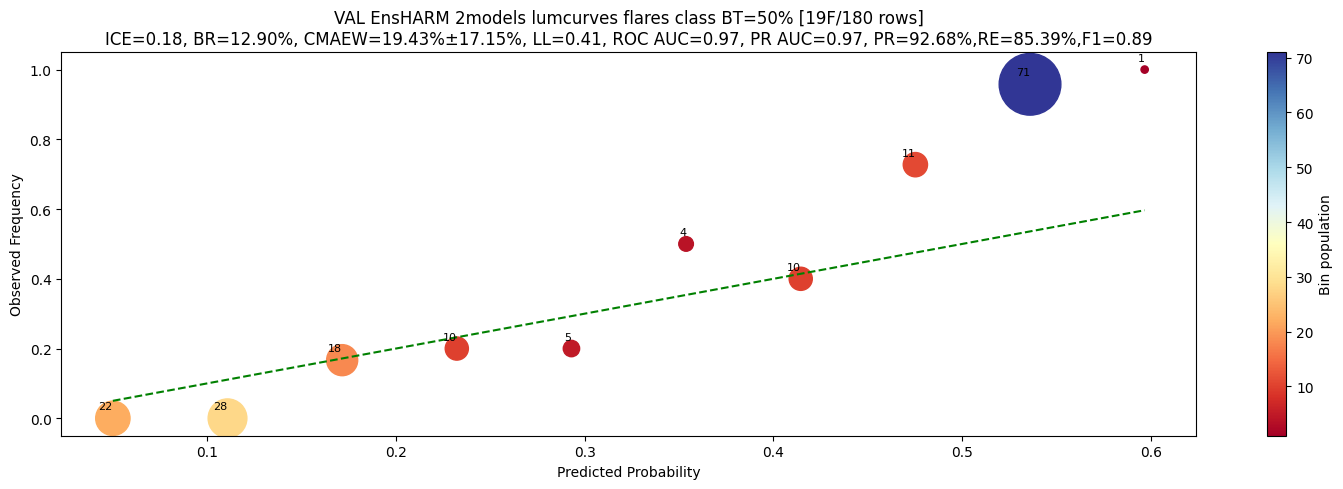

VAL EnsHARM 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.8763    0.9341    0.9043        91
           1     0.9277    0.8652    0.8953        89

    accuracy                         0.9000       180
   macro avg     0.9020    0.8996    0.8998       180
weighted avg     0.9017    0.9000    0.8999       180

ROC AUCs: 1=0.9662
PR AUCs: 1=0.9683
CALIBRATIONs: 
	1: MAEW=19.43%, STD=17.15%, COV=60%
BRIER LOSSes: 
	1=12.9005%
LOG_LOSSes: 
	1=0.4141
ICEs: 
	1=0.1815
TOTAL INTEGRAL ERROR: 0.1815


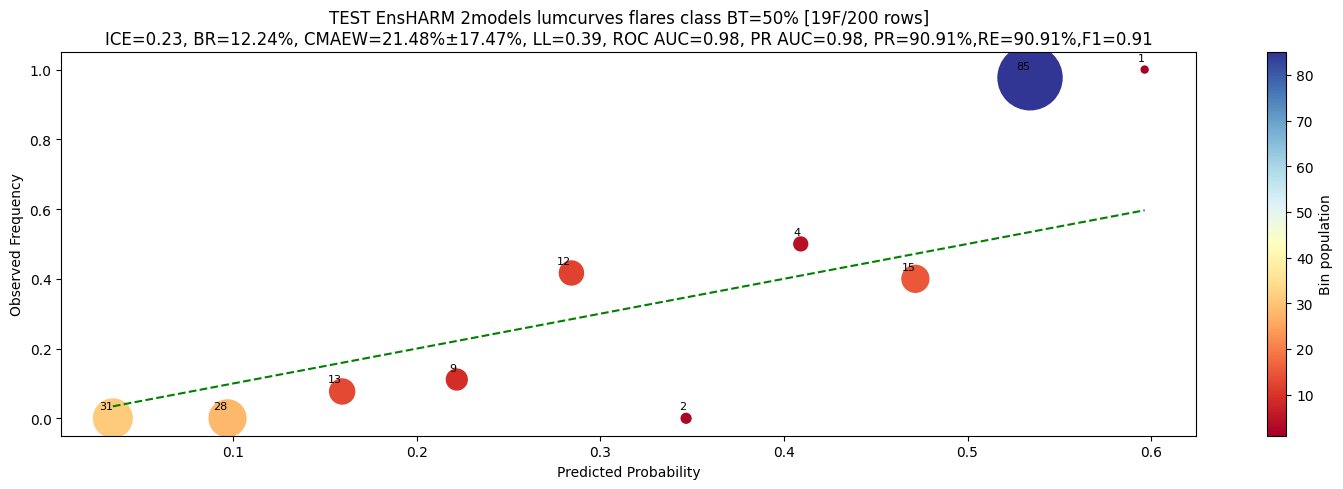

TEST EnsHARM 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.9109    0.9109    0.9109       101
           1     0.9091    0.9091    0.9091        99

    accuracy                         0.9100       200
   macro avg     0.9100    0.9100    0.9100       200
weighted avg     0.9100    0.9100    0.9100       200

ROC AUCs: 1=0.9767
PR AUCs: 1=0.9776
CALIBRATIONs: 
	1: MAEW=21.48%, STD=17.47%, COV=70%
BRIER LOSSes: 
	1=12.2362%
LOG_LOSSes: 
	1=0.3940
ICEs: 
	1=0.2298
TOTAL INTEGRAL ERROR: 0.2298


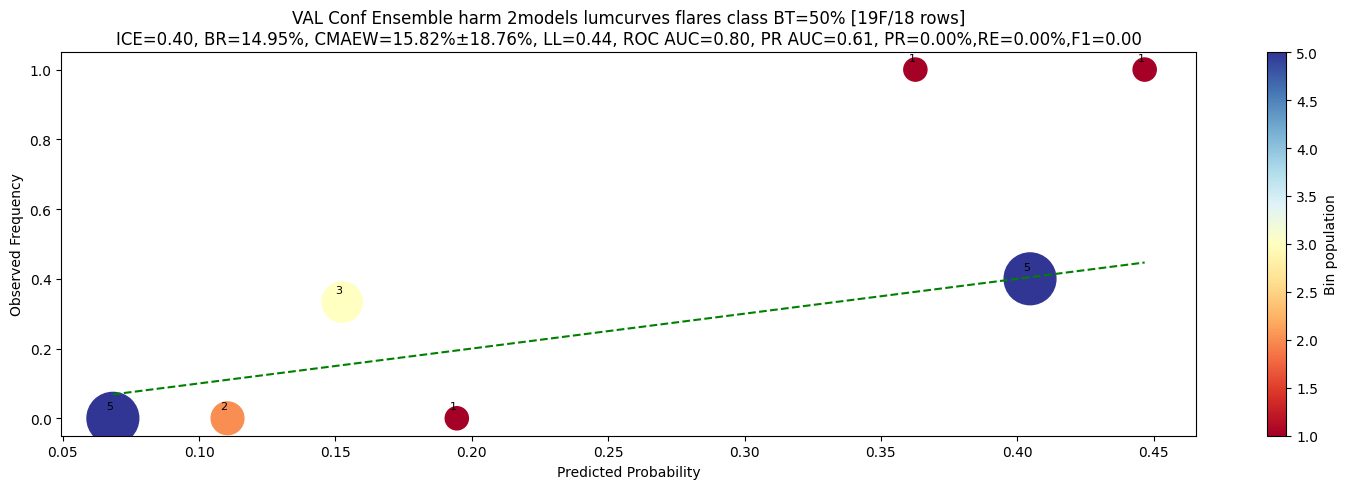

VAL Conf Ensemble harm 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.7222    1.0000    0.8387        13
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.7222        18
   macro avg     0.3611    0.5000    0.4194        18
weighted avg     0.5216    0.7222    0.6057        18

ROC AUCs: 1=0.8000
PR AUCs: 1=0.6054
CALIBRATIONs: 
	1: MAEW=15.82%, STD=18.76%, COV=30%
BRIER LOSSes: 
	1=14.9457%
LOG_LOSSes: 
	1=0.4417
ICEs: 
	1=0.3991
TOTAL INTEGRAL ERROR: 0.3991


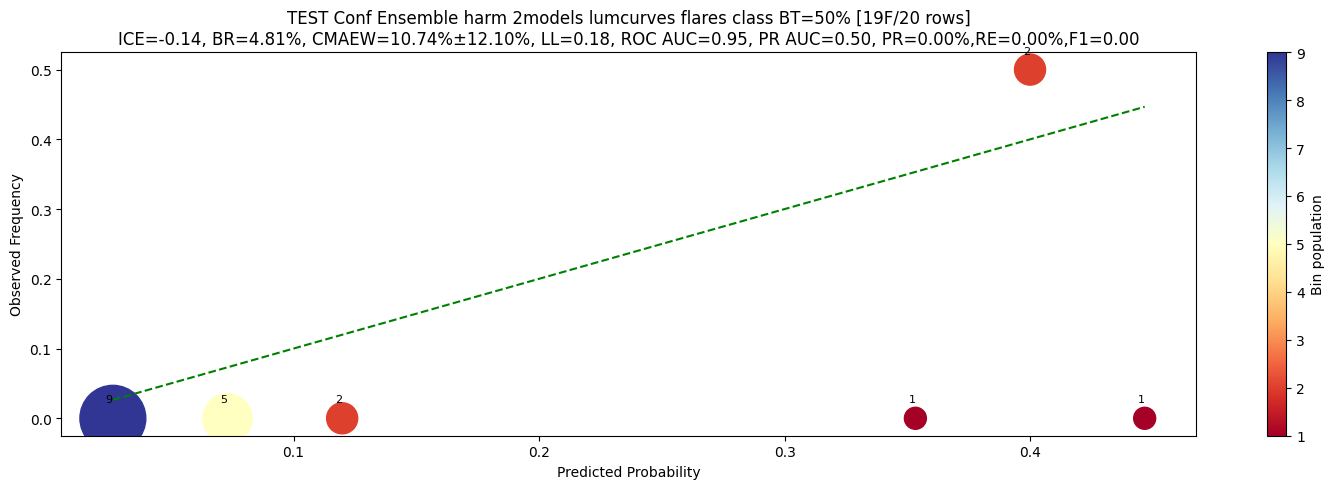

TEST Conf Ensemble harm 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.9500    1.0000    0.9744        19
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.9500        20
   macro avg     0.4750    0.5000    0.4872        20
weighted avg     0.9025    0.9500    0.9256        20

ROC AUCs: 1=0.9474
PR AUCs: 1=0.5000
CALIBRATIONs: 
	1: MAEW=10.74%, STD=12.10%, COV=30%
BRIER LOSSes: 
	1=4.8136%
LOG_LOSSes: 
	1=0.1767
ICEs: 
	1=-0.1377
TOTAL INTEGRAL ERROR: -0.1377


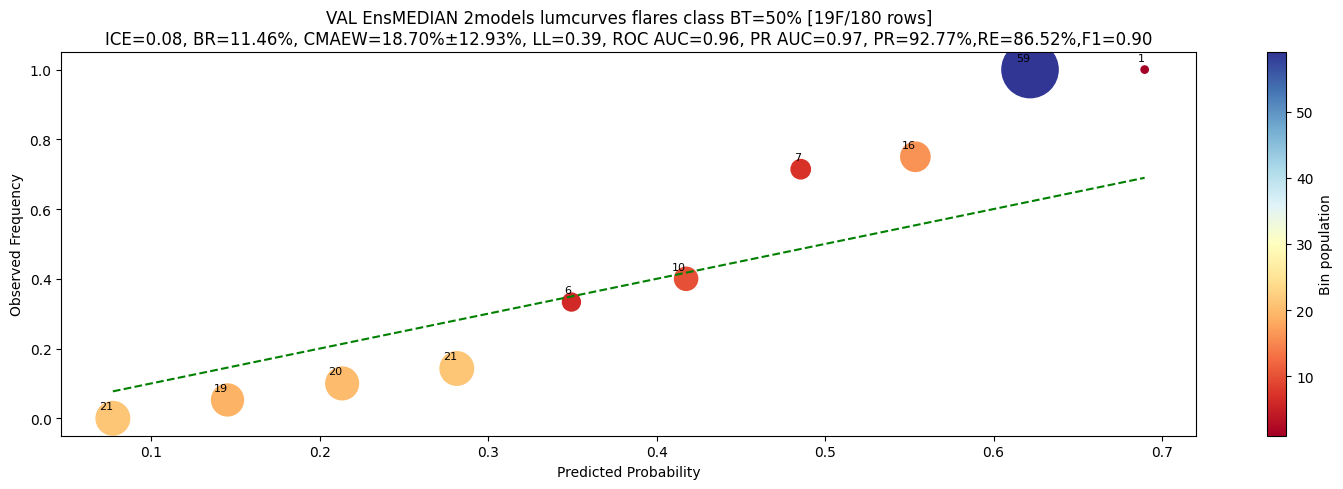

VAL EnsMEDIAN 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.8763    0.9341    0.9043        91
           1     0.9277    0.8652    0.8953        89

    accuracy                         0.9000       180
   macro avg     0.9020    0.8996    0.8998       180
weighted avg     0.9017    0.9000    0.8999       180

ROC AUCs: 1=0.9622
PR AUCs: 1=0.9668
CALIBRATIONs: 
	1: MAEW=18.70%, STD=12.93%, COV=70%
BRIER LOSSes: 
	1=11.4585%
LOG_LOSSes: 
	1=0.3917
ICEs: 
	1=0.0755
TOTAL INTEGRAL ERROR: 0.0755


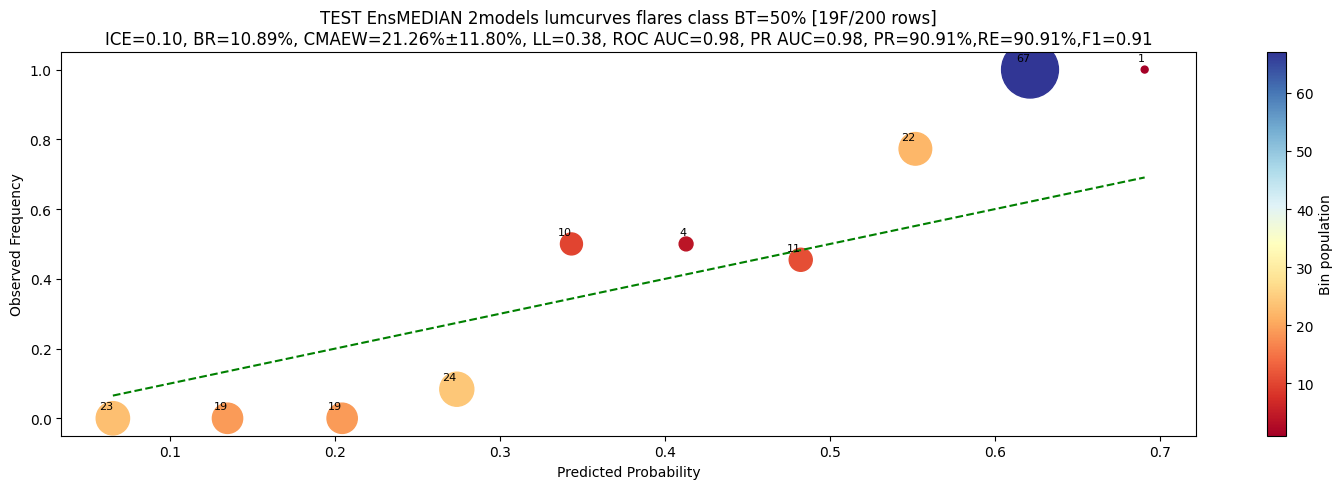

TEST EnsMEDIAN 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.9109    0.9109    0.9109       101
           1     0.9091    0.9091    0.9091        99

    accuracy                         0.9100       200
   macro avg     0.9100    0.9100    0.9100       200
weighted avg     0.9100    0.9100    0.9100       200

ROC AUCs: 1=0.9775
PR AUCs: 1=0.9788
CALIBRATIONs: 
	1: MAEW=21.26%, STD=11.80%, COV=70%
BRIER LOSSes: 
	1=10.8920%
LOG_LOSSes: 
	1=0.3778
ICEs: 
	1=0.1033
TOTAL INTEGRAL ERROR: 0.1033


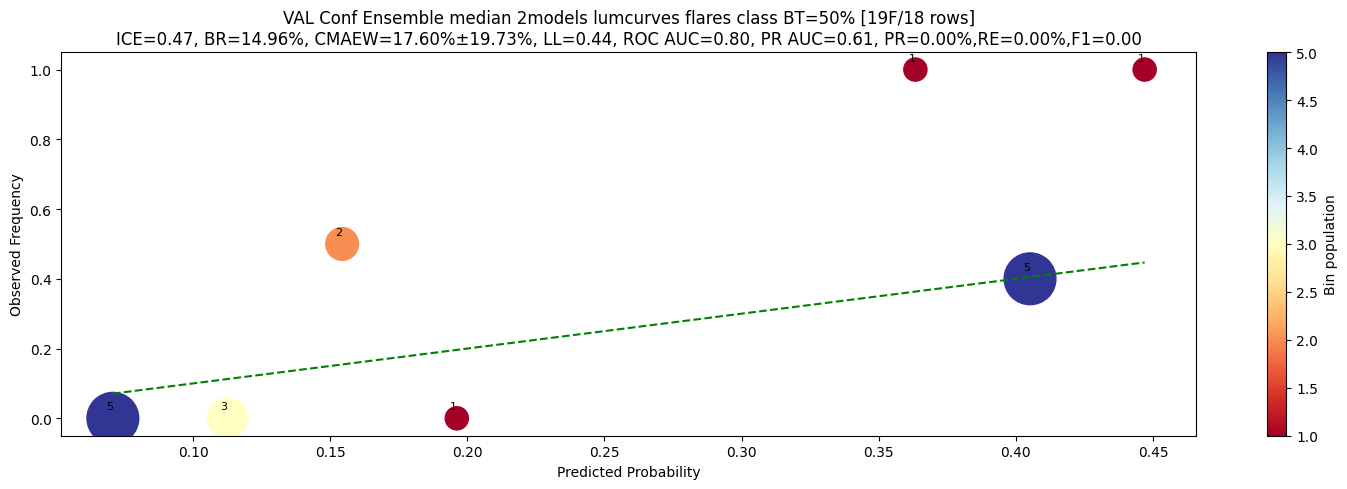

VAL Conf Ensemble median 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.7222    1.0000    0.8387        13
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.7222        18
   macro avg     0.3611    0.5000    0.4194        18
weighted avg     0.5216    0.7222    0.6057        18

ROC AUCs: 1=0.8000
PR AUCs: 1=0.6054
CALIBRATIONs: 
	1: MAEW=17.60%, STD=19.73%, COV=30%
BRIER LOSSes: 
	1=14.9589%
LOG_LOSSes: 
	1=0.4428
ICEs: 
	1=0.4719
TOTAL INTEGRAL ERROR: 0.4719


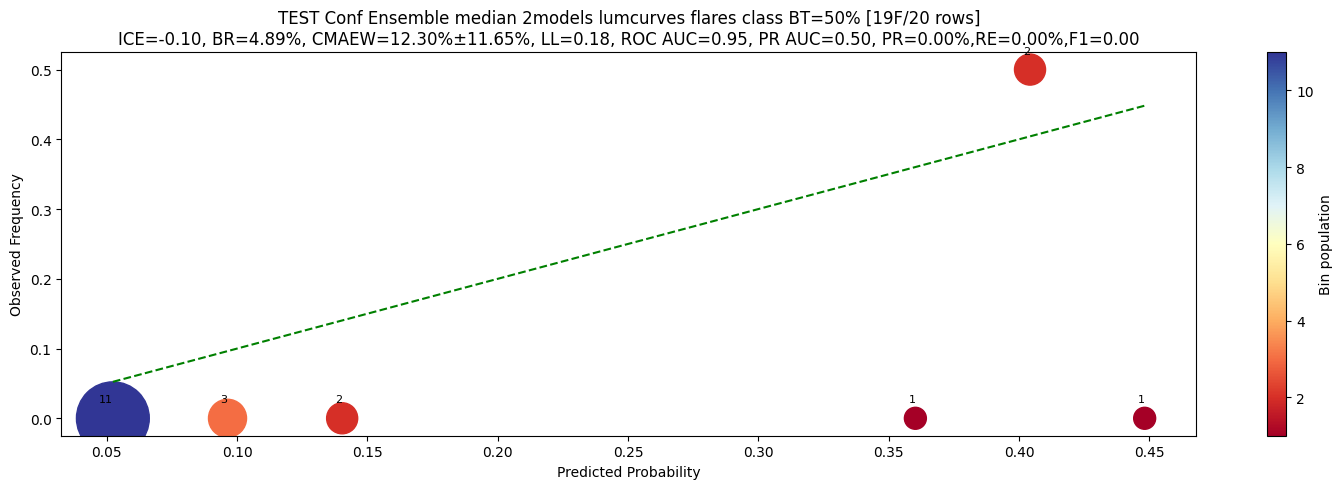

TEST Conf Ensemble median 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.9500    1.0000    0.9744        19
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.9500        20
   macro avg     0.4750    0.5000    0.4872        20
weighted avg     0.9025    0.9500    0.9256        20

ROC AUCs: 1=0.9474
PR AUCs: 1=0.5000
CALIBRATIONs: 
	1: MAEW=12.30%, STD=11.65%, COV=20%
BRIER LOSSes: 
	1=4.8901%
LOG_LOSSes: 
	1=0.1836
ICEs: 
	1=-0.0996
TOTAL INTEGRAL ERROR: -0.0996


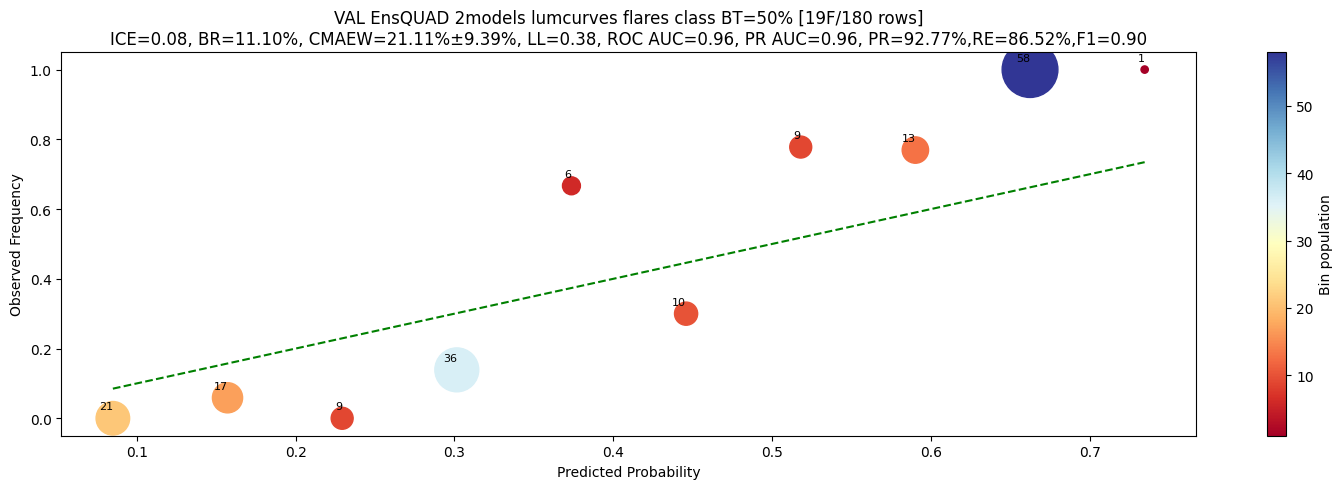

VAL EnsQUAD 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.8763    0.9341    0.9043        91
           1     0.9277    0.8652    0.8953        89

    accuracy                         0.9000       180
   macro avg     0.9020    0.8996    0.8998       180
weighted avg     0.9017    0.9000    0.8999       180

ROC AUCs: 1=0.9581
PR AUCs: 1=0.9647
CALIBRATIONs: 
	1: MAEW=21.11%, STD=9.39%, COV=70%
BRIER LOSSes: 
	1=11.1022%
LOG_LOSSes: 
	1=0.3841
ICEs: 
	1=0.0819
TOTAL INTEGRAL ERROR: 0.0819


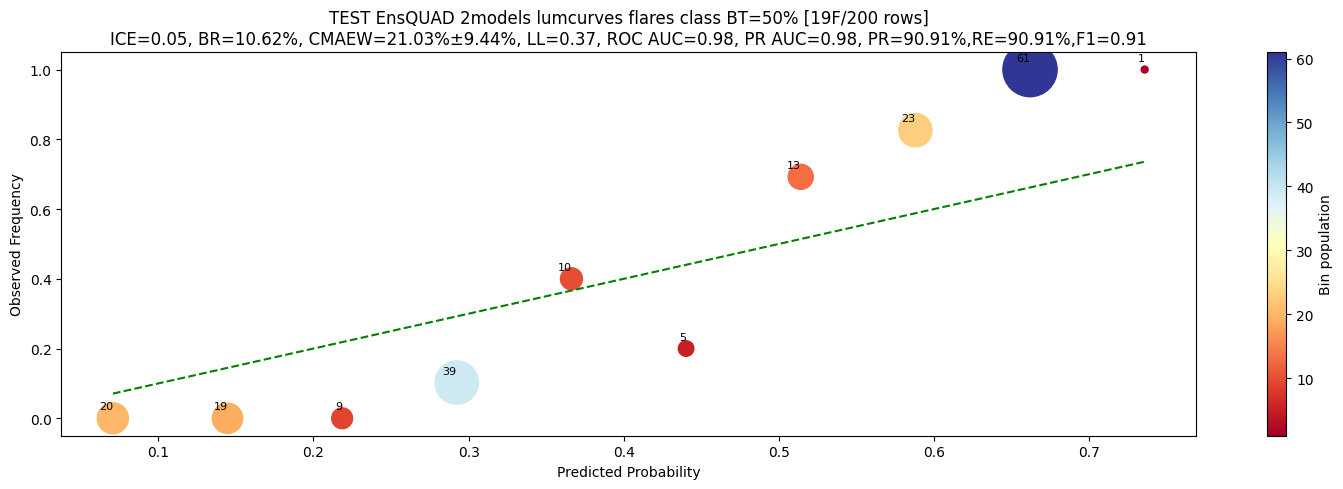

TEST EnsQUAD 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.9109    0.9109    0.9109       101
           1     0.9091    0.9091    0.9091        99

    accuracy                         0.9100       200
   macro avg     0.9100    0.9100    0.9100       200
weighted avg     0.9100    0.9100    0.9100       200

ROC AUCs: 1=0.9762
PR AUCs: 1=0.9781
CALIBRATIONs: 
	1: MAEW=21.03%, STD=9.44%, COV=70%
BRIER LOSSes: 
	1=10.6183%
LOG_LOSSes: 
	1=0.3729
ICEs: 
	1=0.0503
TOTAL INTEGRAL ERROR: 0.0503


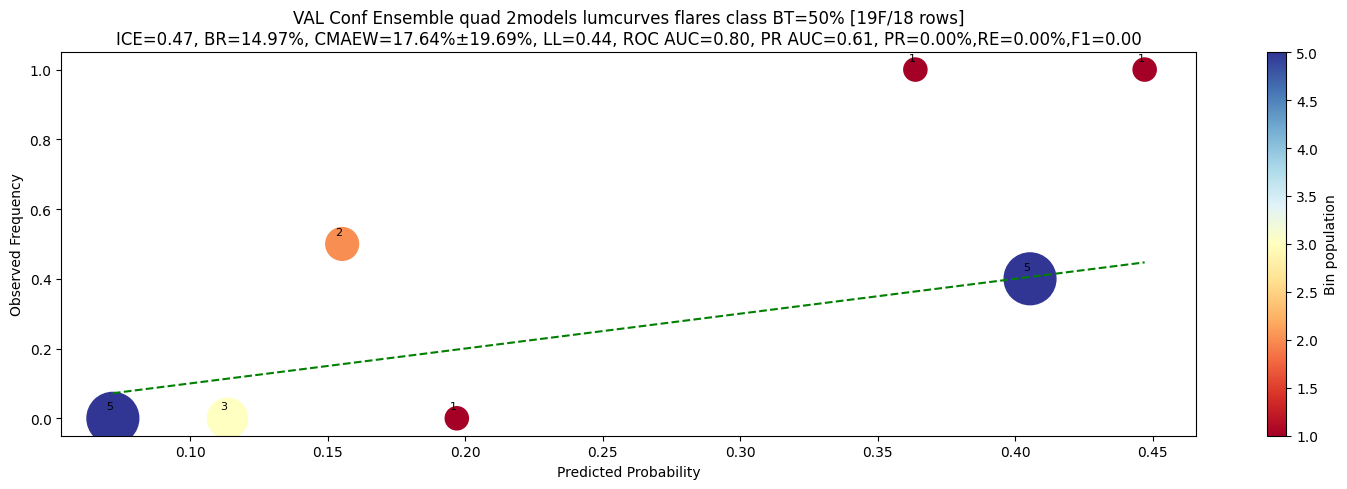

VAL Conf Ensemble quad 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.7222    1.0000    0.8387        13
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.7222        18
   macro avg     0.3611    0.5000    0.4194        18
weighted avg     0.5216    0.7222    0.6057        18

ROC AUCs: 1=0.8000
PR AUCs: 1=0.6054
CALIBRATIONs: 
	1: MAEW=17.64%, STD=19.69%, COV=30%
BRIER LOSSes: 
	1=14.9657%
LOG_LOSSes: 
	1=0.4433
ICEs: 
	1=0.4724
TOTAL INTEGRAL ERROR: 0.4724


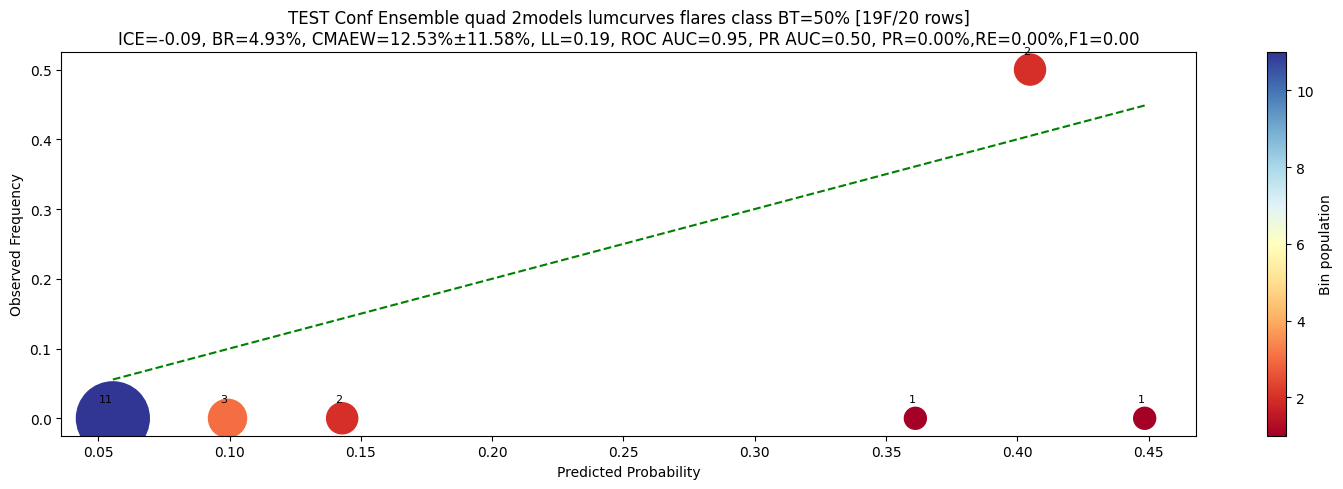

TEST Conf Ensemble quad 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.9500    1.0000    0.9744        19
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.9500        20
   macro avg     0.4750    0.5000    0.4872        20
weighted avg     0.9025    0.9500    0.9256        20

ROC AUCs: 1=0.9474
PR AUCs: 1=0.5000
CALIBRATIONs: 
	1: MAEW=12.53%, STD=11.58%, COV=20%
BRIER LOSSes: 
	1=4.9333%
LOG_LOSSes: 
	1=0.1868
ICEs: 
	1=-0.0940
TOTAL INTEGRAL ERROR: -0.0940


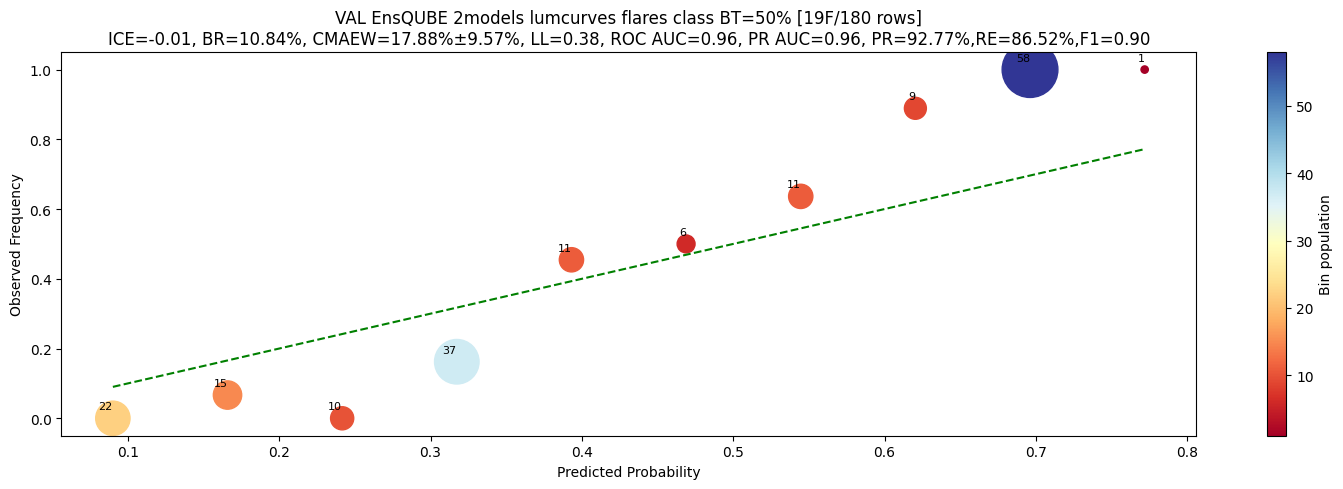

VAL EnsQUBE 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.8763    0.9341    0.9043        91
           1     0.9277    0.8652    0.8953        89

    accuracy                         0.9000       180
   macro avg     0.9020    0.8996    0.8998       180
weighted avg     0.9017    0.9000    0.8999       180

ROC AUCs: 1=0.9558
PR AUCs: 1=0.9634
CALIBRATIONs: 
	1: MAEW=17.88%, STD=9.57%, COV=80%
BRIER LOSSes: 
	1=10.8407%
LOG_LOSSes: 
	1=0.3763
ICEs: 
	1=-0.0087
TOTAL INTEGRAL ERROR: -0.0087


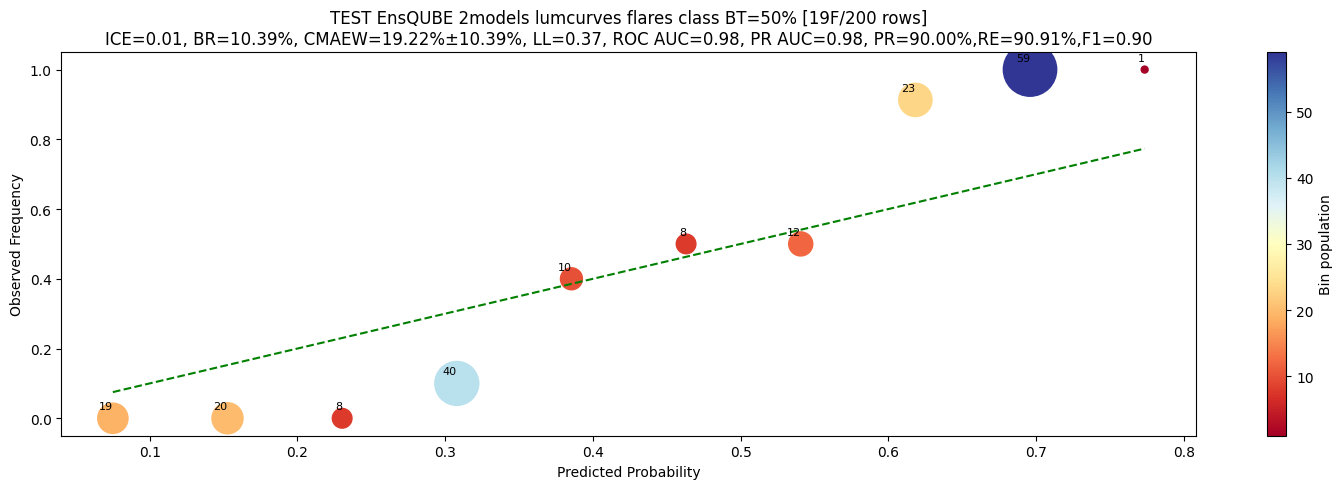

TEST EnsQUBE 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.9109    0.9109    0.9109       101
           1     0.9091    0.9091    0.9091        99

    accuracy                         0.9100       200
   macro avg     0.9100    0.9100    0.9100       200
weighted avg     0.9100    0.9100    0.9100       200

ROC AUCs: 1=0.9757
PR AUCs: 1=0.9777
CALIBRATIONs: 
	1: MAEW=19.22%, STD=10.39%, COV=80%
BRIER LOSSes: 
	1=10.3875%
LOG_LOSSes: 
	1=0.3661
ICEs: 
	1=0.0148
TOTAL INTEGRAL ERROR: 0.0148


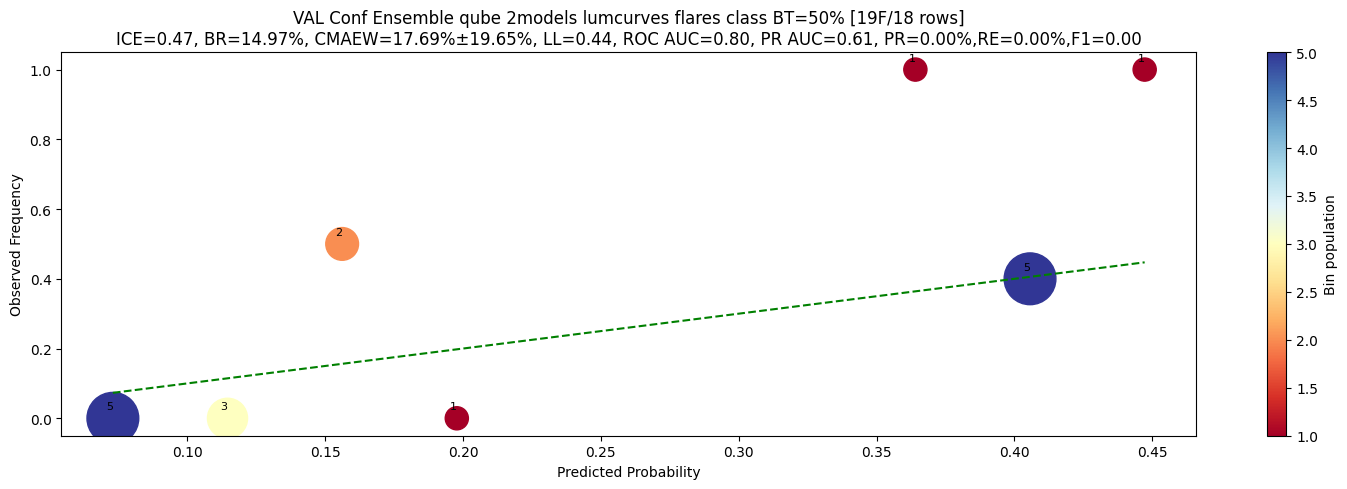

VAL Conf Ensemble qube 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.7222    1.0000    0.8387        13
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.7222        18
   macro avg     0.3611    0.5000    0.4194        18
weighted avg     0.5216    0.7222    0.6057        18

ROC AUCs: 1=0.8000
PR AUCs: 1=0.6054
CALIBRATIONs: 
	1: MAEW=17.69%, STD=19.65%, COV=30%
BRIER LOSSes: 
	1=14.9721%
LOG_LOSSes: 
	1=0.4438
ICEs: 
	1=0.4728
TOTAL INTEGRAL ERROR: 0.4728


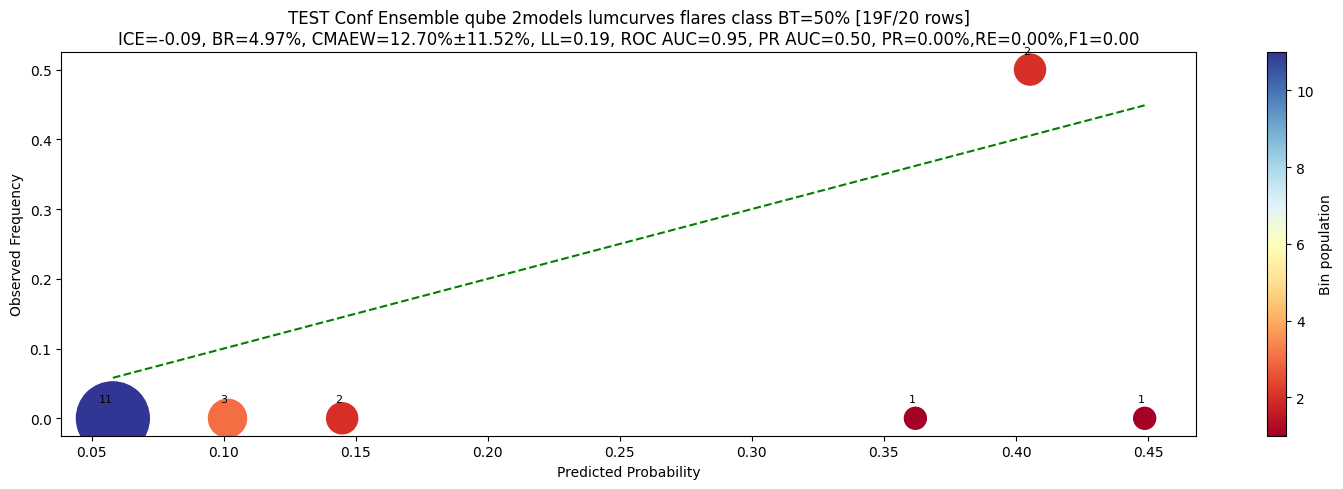

TEST Conf Ensemble qube 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.9500    1.0000    0.9744        19
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.9500        20
   macro avg     0.4750    0.5000    0.4872        20
weighted avg     0.9025    0.9500    0.9256        20

ROC AUCs: 1=0.9474
PR AUCs: 1=0.5000
CALIBRATIONs: 
	1: MAEW=12.70%, STD=11.52%, COV=20%
BRIER LOSSes: 
	1=4.9701%
LOG_LOSSes: 
	1=0.1892
ICEs: 
	1=-0.0898
TOTAL INTEGRAL ERROR: -0.0898


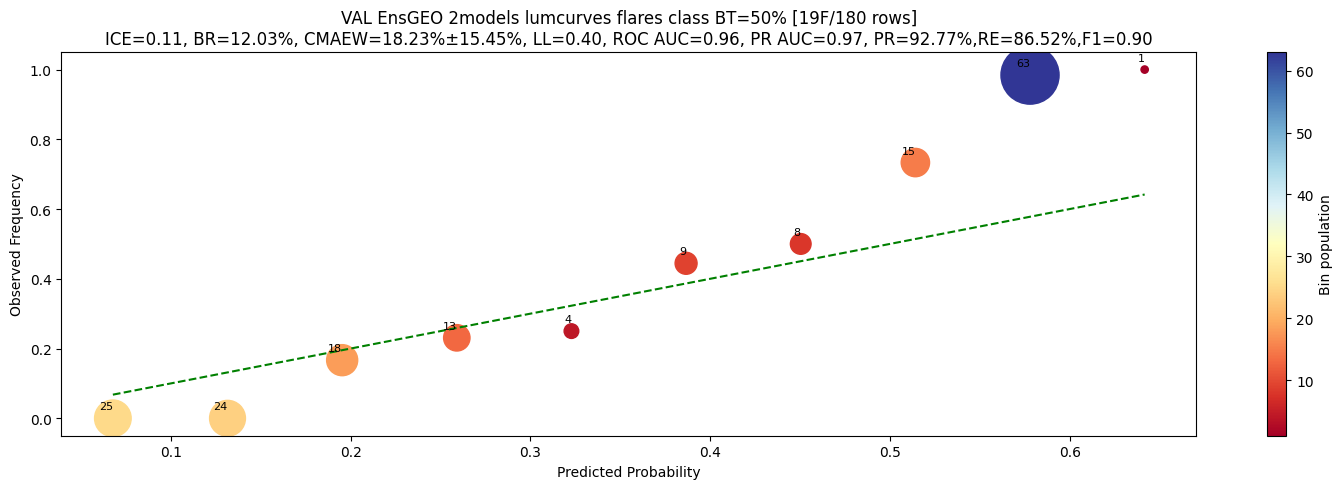

VAL EnsGEO 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.8763    0.9341    0.9043        91
           1     0.9277    0.8652    0.8953        89

    accuracy                         0.9000       180
   macro avg     0.9020    0.8996    0.8998       180
weighted avg     0.9017    0.9000    0.8999       180

ROC AUCs: 1=0.9648
PR AUCs: 1=0.9680
CALIBRATIONs: 
	1: MAEW=18.23%, STD=15.45%, COV=60%
BRIER LOSSes: 
	1=12.0278%
LOG_LOSSes: 
	1=0.4000
ICEs: 
	1=0.1101
TOTAL INTEGRAL ERROR: 0.1101


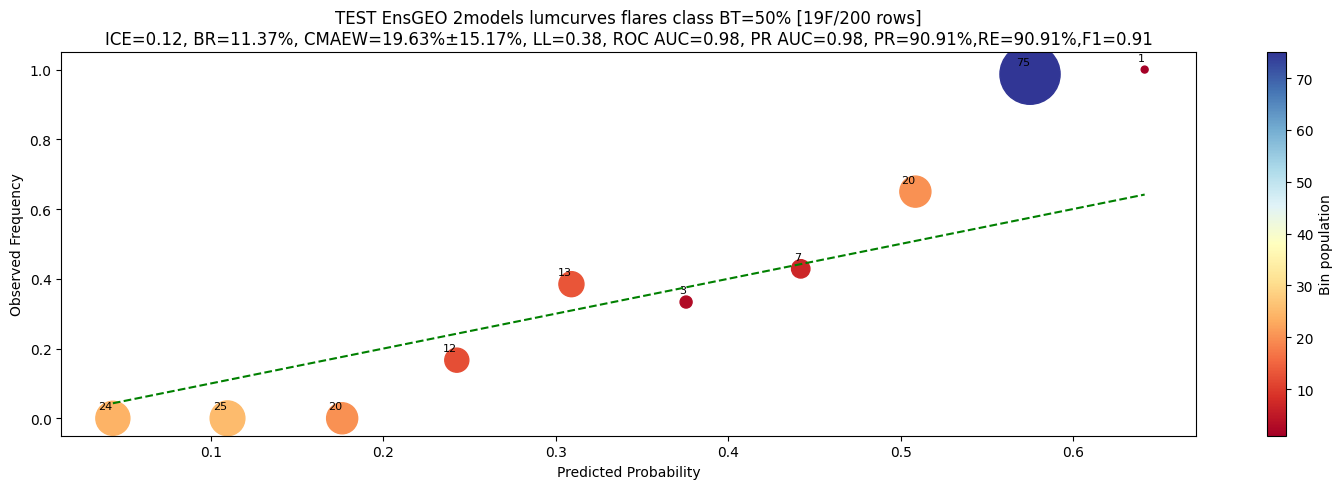

TEST EnsGEO 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.9109    0.9109    0.9109       101
           1     0.9091    0.9091    0.9091        99

    accuracy                         0.9100       200
   macro avg     0.9100    0.9100    0.9100       200
weighted avg     0.9100    0.9100    0.9100       200

ROC AUCs: 1=0.9772
PR AUCs: 1=0.9784
CALIBRATIONs: 
	1: MAEW=19.63%, STD=15.17%, COV=70%
BRIER LOSSes: 
	1=11.3694%
LOG_LOSSes: 
	1=0.3818
ICEs: 
	1=0.1242
TOTAL INTEGRAL ERROR: 0.1242


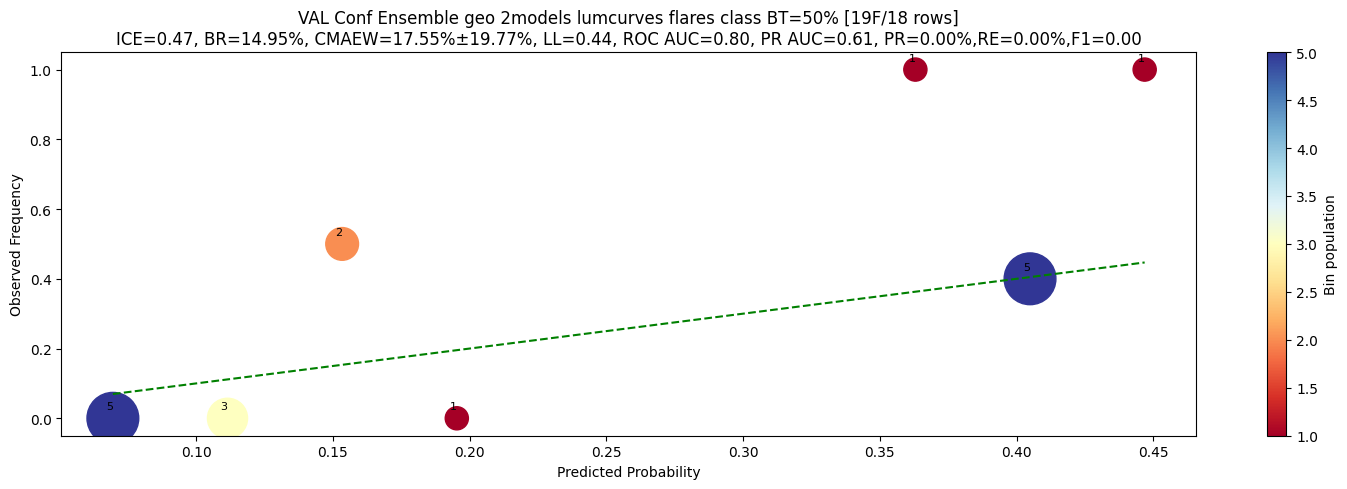

VAL Conf Ensemble geo 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.7222    1.0000    0.8387        13
           1     0.0000    0.0000    0.0000         5

    accuracy                         0.7222        18
   macro avg     0.3611    0.5000    0.4194        18
weighted avg     0.5216    0.7222    0.6057        18

ROC AUCs: 1=0.8000
PR AUCs: 1=0.6054
CALIBRATIONs: 
	1: MAEW=17.55%, STD=19.77%, COV=30%
BRIER LOSSes: 
	1=14.9521%
LOG_LOSSes: 
	1=0.4422
ICEs: 
	1=0.4714
TOTAL INTEGRAL ERROR: 0.4714


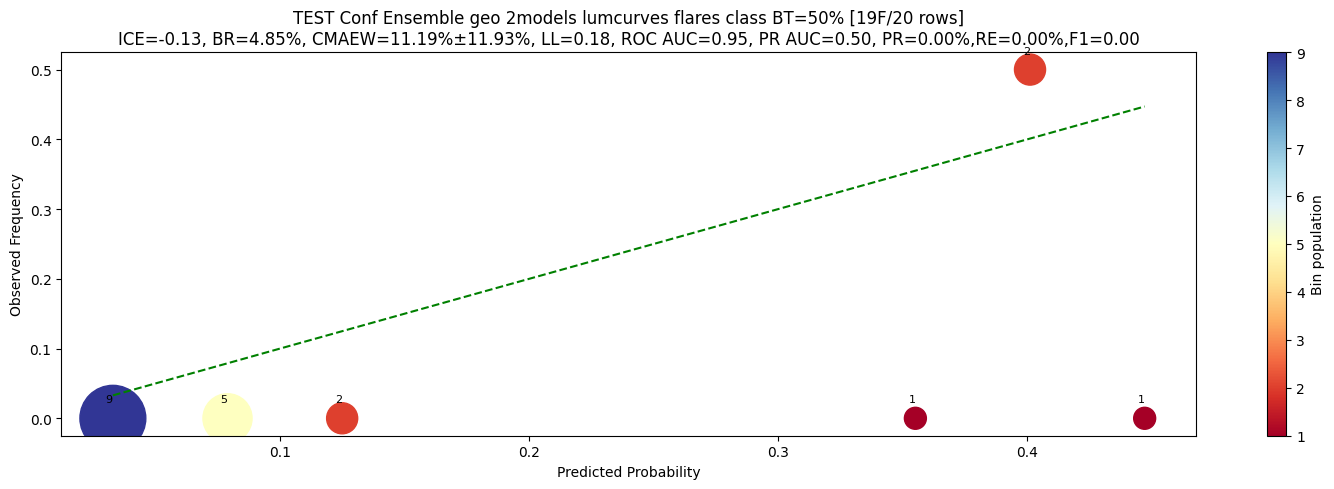

TEST Conf Ensemble geo 2models lumcurves flares class BT=50%
              precision    recall  f1-score   support

           0     0.9500    1.0000    0.9744        19
           1     0.0000    0.0000    0.0000         1

    accuracy                         0.9500        20
   macro avg     0.4750    0.5000    0.4872        20
weighted avg     0.9025    0.9500    0.9256        20

ROC AUCs: 1=0.9474
PR AUCs: 1=0.5000
CALIBRATIONs: 
	1: MAEW=11.19%, STD=11.93%, COV=30%
BRIER LOSSes: 
	1=4.8470%
LOG_LOSSes: 
	1=0.1796
ICEs: 
	1=-0.1273
TOTAL INTEGRAL ERROR: -0.1273
time: 1min 57s (started: 2025-12-17 04:27:52 +03:00)


In [35]:
target_name = "lumcurves"

models, metadata = train_mlframe_models_suite(
    df=features,
    target_name=target_name,
    model_name=f"flares",
    features_and_targets_extractor=ft_extractor,
    mlframe_models="mlp cb".split(),
    init_common_params={"show_perf_chart": True, "show_fi": True},
    use_ordinary_models=True,
    split_config=TrainingSplitConfig(shuffle_val=True, shuffle_test=True),
    use_mlframe_ensembles=True,
    data_dir="data",
    models_dir=None,
    verbose=True,
)